In [1]:
import pandas as pd
import MFLibrary as mf
import matplotlib.pyplot as plt
import sqlite3
from run_finder.team_dict_functions import *



In [2]:
teamdict = mf.csv.read_dictionary("team_dictionary/team_dict.csv")

In [3]:
diff3 = pd.read_csv('data/run_calculation_diff3.csv')

In [4]:
conn = sqlite3.connect('C:\Dropbox\Dropbox\HAXz\CBBTO\data\cbb.db')
curr = conn.cursor()
# Exclude unused events - also typo in rebound in a few instances

data = pd.read_sql_query("""SELECT rowid,*
                        FROM playbyplay
                        WHERE LOWER(event) not like '%free throw%'
                        AND LOWER(event) not like '% missed %'
                        AND LOWER(event) not like '%end of %'
                        AND LOWER(event) not like '% reboun%'
                        AND LOWER(event) not like '% steal%'
                        AND LOWER(event) not like '%foul on%'
                        AND gameid not in ('253240066', '253510006', '260692440', '283190221',
                        '283192166', '283190201', '293170264', '283342390', '293172633')""", conn)
conn.close()

data = data.apply(pd.to_numeric,errors='ignore')

In [5]:
data.head(30)

,rowid,gameid,event,team1,team2,score1,score2,time
0,7,253130183,Demetris Nichols made Three Point Jumper.,COR,SYR,0,3,1157
1,29,253130183,Louie McCroskey made Two Point Layup.,COR,SYR,0,5,1036
2,34,253130183,Darryl Watkins made Two Point Layup.,COR,SYR,0,7,988
3,44,253130183,Official TV Timeout.,COR,SYR,2,9,948
4,65,253130183,Adam Gore made Two Point Jumper.,COR,SYR,4,11,814
5,66,253130183,Darryl Watkins made Two Point Jumper.,COR,SYR,4,13,785
6,73,253130183,Lenny Collins made Three Point Jumper.,COR,SYR,7,13,735
7,74,253130183,Official TV Timeout.,COR,SYR,7,13,718
8,75,253130183,Lenny Collins made Three Point Jumper.,COR,SYR,10,13,711
9,76,253130183,Terrence Roberts made Two Point Dunk Shot.,COR,SYR,10,15,659


In [6]:
runs = diff3.loc[(diff3.scorediffdelta > 6) | (diff3.scorediffdelta < -6)]

In [7]:
runs.head()

,Unnamed: 0,rowid,gameid,event,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
15,23,168,253130183,Ryan Rourke made Two Point Layup.,-2,1068,99.0,7.0,4.242424
22,30,215,253130183,Adam Gore made Three Point Jumper.,4,720,108.0,9.0,5.000000
23,31,227,253130183,Lenny Collins made Three Point Jumper.,5,591,218.0,7.0,1.926606
42,54,405,253120183,Gerry McNamara made Three Point Jumper.,-15,307,364.0,-9.0,-1.483516
46,64,488,253120183,Eric Devendorf made Two Point Layup.,-24,904,276.0,-7.0,-1.521739


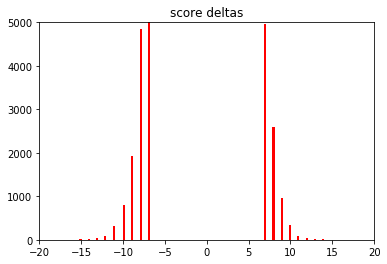

In [8]:
fig = plt.figure()
plt.ylim([0,5000])
plt.xlim([-20,20])
#plt.hist(test['delta1'],bins=20, label='team2')
#plt.hist(test['delta2'], bins=20, color='y', alpha= 0.5, label='team2')
plt.hist(runs['scorediffdelta'], bins=250, color='r', alpha=1, label='diff')
plt.title("score deltas")
plt.show()

In [9]:
runs.describe()

,Unnamed: 0,rowid,gameid,scorediff,time,timedelta,scorediffdelta,normedscorediffdelta
count,25235.000000,2.523500e+04,2.523500e+04,25235.000000,25235.000000,25235.000000,25235.000000,25235.000000
mean,186786.706360,1.168268e+06,3.281171e+08,-6.859560,574.552883,164.815019,-2.304656,-0.929087
std,107466.526435,7.021368e+05,5.550812e+07,14.132513,275.827245,70.719002,7.521763,3.590813
min,23.000000,1.680000e+02,2.531202e+08,-80.000000,91.000000,3.000000,-41.000000,-140.000000
25%,95494.000000,5.534995e+05,2.807603e+08,-15.000000,337.000000,114.000000,-8.000000,-3.414634
50%,185129.000000,1.140644e+06,3.033123e+08,-7.000000,574.000000,151.000000,-7.000000,-2.232558
75%,280829.000000,1.787962e+06,4.005466e+08,3.000000,810.000000,201.000000,7.000000,2.500000
max,373425.000000,2.401448e+06,4.008737e+08,50.000000,1141.000000,1010.000000,21.000000,28.421053


In [20]:
#output = [timeouts - list of callers, caller winning, runstop]

skips = 0
difflength = 3 # This value should extend a little to see if there was a timeout during the development of the run
extraevents = 0 # Allows for a bit of extra data if desired. If TOs were called during the lead up to run start, this value will need to be increased to get all of the relevant data
results = []
for i,row in runs.iterrows():
    # continuous runs will show up as new rows in runs.
    # We want to consider each run it's own event, so we skip run events that were accounted for in previous loop
    for n in range(skips):
        continue
    skips = 0
    
    indx = data.loc[data.rowid == row['rowid']].index.values[0]
    runstarttime = row['time']
    working = data.iloc[indx-difflength-extraevents:indx+10] # Grab a few extra events 
    teamlist = [data.iloc[indx]['team1'].strip(), data.iloc[indx]['team2'].strip()]
    timeouts = []
    scorefuture = []
    for j,event in working.iterrows():
        
        # If the slice range crosses a period skip it the incorrect events
        if runstarttime > event['time'] and j < indx:
            continue
                   
        if j == indx - difflength:     
            # if score difference > for team 1 return index 0. If team 2 scores more, return 1
            runnerindex = 0 if data.iloc[indx]['score1'] - event['score1'] > data.iloc[indx]['score2']-event['score2'] else 1
            runner = teamlist[runnerindex]
        
        if event['team1'] not in teamlist:
            
            print('borked')
            print(event['team1'])
            print(teamlist)
            break
            
        if 'timeout' in event['event'].lower():
            # Check if timeout caller is winning
            caller = determine_TO_caller(event['event'], teamlist, teamdict)
            is_winning = is_caller_winning(teamlist, [event["score1"],event["score2"]], caller)
            # Check if the TO caller is the team that is running (unlikely)
            is_running = caller == runner # TV == False
            timeouts.append([j-indx, caller, is_winning, is_running])
            continue # No scoring occurred so we don't need to finish the loop (prevent duplicates from being added to score future)
            
        if j > indx:
            scorefuture.append([event['score1'],event['score2']])
            # Non-running team scored points (0 - 1 = -1 == 1 in two item list)
            if scorefuture[-2][runnerindex-1] < scorefuture[-1][runnerindex-1] or event['time']<30:
                break
            else:
                skips += 1
        elif j == indx:
            scorefuture.append([event['score1'],event['score2']])
    
    # Get Final score
    final = data.loc[(data.gameid == row.gameid)].tail(1)
    # Use final score to determine the index of the winning team
    winner = teamlist[0 if (final['score1'].values > final['score2'].values) else 1]
    results.append([runner, timeouts, scorefuture, winner])
        
for row in results:
    print(row)
    break

      rowid     gameid                                              event  \
9473  42748  253520057                               Official TV Timeout.   
9474  42754  253520057  Al Horford made Two Point Dunk Shot.  Assisted...   
9475  42761  253520057                  Joakim Noah made Two Point Layup.   
9476  42769  253520057  David Huertas made Three Point Jumper.  Assist...   
9477  42770  253520057                         Jacksonville Full Timeout.   
9478  42774  253520057                               Official TV Timeout.   
9479  42778  253552440                                           End Game   
9480  42779  253520057  Joakim Noah made Two Point Dunk Shot.  Assiste...   
9481  42788  253520057  David Huertas made Two Point Jumper.  Assisted...   
9482  42796  253520057                David Huertas made Two Point Layup.   
9483  42800  253520057  Antonio Cool made Two Point Layup.  Assisted b...   
9484  42802  253520057  Joakim Noah made Two Point Layup.  Assisted by...   

         rowid     gameid                                              event  \
144640  603063  283450265                  Aron Baynes made Two Point Layup.   
144641  603064  283450265               Austin Daye made Three Point Jumper.   
144642  603069  283450265                Matt Bouldin made Two Point Jumper.   
144643  603072  283450265                Josh Heytvelt made Two Point Layup.   
144644  603080  283460222                               Official TV Timeout.   
144645  603081  283450265  Josh Heytvelt made Two Point Jumper.  Assisted...   
144646  603082  283450265                Washington State 30 Second Timeout.   
144647  603087  283450265                               Official TV Timeout.   
144648  603090  283450265          Demetri Goodson made Two Point Dunk Shot.   
144649  603091  283450265  Nikola Koprivica made Three Point Jumper.  Ass...   
144650  603098  283450265               Steven Gray made Two Point Tip Shot.   
144651  603101  283450265               

         rowid     gameid                                              event  \
203387  800556  293150153                                 Dami Sapara Block.   
203388  800558  293150153                Deon Thompson made Two Point Layup.   
203389  800563  293240153                              Kris Joseph Turnover.   
203390  800564  293150153  Dexter Strickland made Two Point Jumper.  Assi...   
203391  800567  293150153                                               null   
203392  800568  293150153           Dexter Strickland made Two Point Jumper.   
203393  800571  293150153                Deon Thompson made Two Point Layup.   
203394  800573  293150153                                               null   
203395  800577  293150153                            Larry Drew II Turnover.   
203396  800578  293150153                          Michael Glasker Turnover.   
203397  800579  293150153                            Deon Thompson Turnover.   
203398  800581  293150153               

         rowid     gameid                                              event  \
233368  894910  293650150                               Official TV Timeout.   
233369  894913  293650150                              Rob Belcore Turnover.   
233370  894915  293650150                Mason Plumlee made Two Point Layup.   
233371  894916  293650150  Justin Reilly made Two Point Layup.  Assisted ...   
233372  894919  293650150               Andre Dawkins made Two Point Jumper.   
233373  894924  293650150               Ryan Kelly made Two Point Dunk Shot.   
233374  894925  293650052                          Chris Singleton Turnover.   
233375  894930  293650150                Mason Plumlee made Two Point Layup.   
233376  894935  293650150                                  Ryan Kelly Block.   
233377  894939  293650150                                               null   
233378  894943  293650150                                           End Game   
233379  894944  293650052  Deividas Dulk

          rowid     gameid                                    event team1  \
277080  1033227  300660046        Greg Monroe made Two Point Layup.   CIN   
277081  1033232  300660046        Jason Clark made Two Point Layup.   CIN   
277082  1033236  300650344                    J.P. Prince Turnover.  TENN   
277083  1033238  300660046  Austin Freeman made Three Point Jumper.   CIN   
277084  1033241  300660046                    Jason Clark Turnover.   CIN   
277085  1033243  300660046  Lance Stephenson made Two Point Jumper.   CIN   
277086  1033250  300660046   Lance Stephenson made Two Point Layup.   CIN   
277087  1033252  300660046                     Official TV Timeout.   CIN   
277088  1033258  300660046                   Ibrahima Thomas Block.   CIN   
277089  1033262  300660046    Chris Wright made Three Point Jumper.   CIN   
277090  1033267  300660046                    Larry Davis Turnover.   CIN   
277091  1033271  300660046                     Official TV Timeout.   CIN   

          rowid     gameid                                              event  \
286186  1062092  300792633                            Cameron Tatum Turnover.   
286187  1062099  300792633                            Scotty Hopson Turnover.   
286188  1062104  300792633            Brian Williams made Two Point Tip Shot.   
286189  1062110  300792633  Wayne Chism made Three Point Jumper.  Assisted...   
286190  1062111  300792633                              D.J. Cooper Turnover.   
286191  1062113  300792633  Scotty Hopson made Two Point Layup.  Assisted ...   
286192  1062114  300792633                            Ohio 30 Second Timeout.   
286193  1062116  300792633                               Official TV Timeout.   
286194  1062118  300792633                                               null   
286195  1062119  300792086                             B.J. Jenkins Turnover.   
286196  1062124  300792633                 D.J. Cooper made Two Point Jumper.   
286197  1062125  300792633  

          rowid     gameid                                              event  \
306049  1124668  303160258  Billy Baron made Three Point Jumper.  Assisted...   
306050  1124671  303160276                            Joseph Morgan Turnover.   
306051  1124672  303160258  Billy Baron made Three Point Jumper.  Assisted...   
306052  1124675  303160258  K.T. Harrell made Three Point Jumper.  Assiste...   
306053  1124676  303160258                  William & Mary 30 Second Timeout.   
306054  1124677  303160258                 Marcus Kitts made Two Point Layup.   
306055  1124678  303160258                        Virginia 30 Second Timeout.   
306056  1124679  303160258  K.T. Harrell made Two Point Jumper.  Assisted ...   
306057  1124680  303160258  Quinn McDowell made Three Point Jumper.  Assis...   
306058  1124682  303160258                               Official TV Timeout.   
306059  1124683  303160258  K.T. Harrell made Three Point Jumper.  Assiste...   
306060  1124684  303160258  

          rowid     gameid                                              event  \
357638  1287455  310420171                          Steve Frankoski Turnover.   
357639  1287457  310420171                         Brendan Connolly Turnover.   
357640  1287461  310420171                                  Mark Cisco Block.   
357641  1287463  310420171                          Will Barrett made Jumper.   
357642  1287468  310420171                              T.J. Bray made Layup.   
357643  1287469  310420171                          Steve Frankoski Turnover.   
357644  1287472  310420171                           John Comfort made Layup.   
357645  1287475  310420171                              Bobby Foley Turnover.   
357646  1287485  310420159                       Sean McGonagill made Jumper.   
357647  1287494  310420159  Jabari Trotter made Three Point Jumper.  Assis...   
357648  1287499  310420159                              Dockery Walker Block.   
357649  1287502  310420159  

          rowid     gameid                                              event  \
407135  1442978  323160275                                               null   
407136  1442983  323160275                         Evan Anderson made Jumper.   
407137  1442985  323160275                               Official TV Timeout.   
407138  1442990  323160239                         Derrell Taylor made Layup.   
407139  1442991  323160275                  Southeastern Louisia Defensive R.   
407140  1442996  323160275                          Zak Showalter made Layup.   
407141  1442999  323160275                 Dre Evans made Three Point Jumper.   
407142  1443000  323160275                          George Marshall Turnover.   
407143  1443001  323160275                                Dre Evans Turnover.   
407144  1443003  323160275  Jared Berggren made Layup.  Assisted by Zak Sh...   
407145  1443004  323160275                          Onochie Ochie made Layup.   
407146  1443005  323160275  

          rowid     gameid                                              event  \
456277  1603223  400506833  Cory Jefferson made Dunk. Assisted by Royce O'...   
456278  1603224  400506833                               Bobby Word Turnover.   
456279  1603226  400506833  Brady Heslip made Three Point Jumper. Assisted...   
456280  1603233  400506833  Rico Gathers made Dunk. Assisted by Ish Wainri...   
456281  1603254  400506151                          Jump Ball won by Colorado   
456282  1603255  400506151  Xavier Johnson made Three Point Jumper. Assist...   
456283  1603260  400506151  Kenny Gaines made Three Point Jumper. Assisted...   
456284  1603261  400506151  Xavier Johnson made Three Point Jumper. Assist...   
456285  1603262  400506151                       Marcus Thornton made Jumper.   
456286  1603269  400506151                          Marcus Thornton Turnover.   
456287  1603270  400506151                        Spencer Dinwiddie Turnover.   
456288  1603276  400506151  

          rowid     gameid                                              event  \
510752  1789043  400546623                             Joe McDonald Turnover.   
510753  1789046  400546623                                Official TV Timeout   
510754  1789049  400546623                         Miguel Cartagena Turnover.   
510755  1789051  400546623                           Mo Alie-Cox made Jumper.   
510756  1789061  400546623                                 Mo Alie-Cox Block.   
510757  1789079  400546629                            Jump Ball won by Baylor   
510758  1789086  400546629                            Georges Niang Turnover.   
510759  1789088  400546629                           Kenny Chery made Jumper.   
510760  1789097  400546629  Brady Heslip made Three Point Jumper. Assisted...   
510761  1789100  400546629  Brady Heslip made Three Point Jumper. Assisted...   
510762  1789108  400546629                                Official TV Timeout   
510763  1789130  400546629  

          rowid     gameid                                              event  \
549593  1919481  400585770                             Devin Wilson Turnover.   
549594  1919489  400585770  Devin Williams made Dunk. Assisted by Jevon Ca...   
549595  1919492  400585770                               Adam Smith Turnover.   
549596  1919494  400585770  Nathan Adrian made Layup. Assisted by Jevon Ca...   
549597  1919495  400585770                           Satchel Pierce Turnover.   
549598  1919496  400585770                                Official TV Timeout   
549599  1919497  400587884                      Yolonzo Moore II made Jumper.   
549600  1919498  400585770  Jevon Carter made Three Point Jumper. Assisted...   
549601  1919499  400585770                             Malik Muller Turnover.   
549602  1919501  400585770  Jaysean Paige made Layup. Assisted by Nathan A...   
549603  1919504  400585770  Devin Williams made Jumper. Assisted by Nathan...   
549604  1919505  400585770  

          rowid     gameid                                              event  \
579806  2021364  400585848                                Official TV Timeout   
579807  2021367  400585848                             Malek Harris Turnover.   
579808  2021369  400585848  Al Freeman made Layup. Assisted by Royce O'Neale.   
579809  2021372  400585848  Royce O'Neale made Three Point Jumper. Assiste...   
579810  2021373  400585848                               Tre Harris Turnover.   
579811  2021374  400585848                                    Baylor  Timeout   
579812  2021375  400585848                                Deng Deng Turnover.   
579813  2021379  400585848  T.J. Maston made Layup. Assisted by Ishmail Wa...   
579814  2021389  400588463                            Jump Ball won by Xavier   
579815  2021390  400588463  Myles Davis made Three Point Jumper. Assisted ...   
579816  2021391  400588463                            Kellen Dunham Turnover.   
579817  2021394  400588463  

          rowid     gameid                                              event  \
620252  2158500  400813823                             Dusan Ristic Turnover.   
620253  2158510  400825756                           Johnnie Shuler Turnover.   
620254  2158519  400813823                           D'Angelo Allen Turnover.   
620255  2158520  400813823  Mark Tollefsen made Jumper. Assisted by Parker...   
620256  2158522  400813823                                Official TV Timeout   
620257  2158525  400813823                Parker Jackson-Cartwright Turnover.   
620258  2158528  400813823                         Kevin Puryear made Jumper.   
620259  2158536  400813823                             Wes Clark made Jumper.   
620260  2158537  400813823  Justin Simon made Jumper. Assisted by Dusan Ri...   
620261  2158539  400813823                                Dusan Ristic Block.   
620262  2158542  400813823                             Chance Comanche Block.   
620263  2158550  400813823  

          rowid     gameid                                              event  \
670112  2327841  400830926            Jordan Woodard made Two Point Tip Shot.   
670113  2327844  400830926  Buddy Hield made Layup. Assisted by Isaiah Cou...   
670114  2327846  400830926                                Official TV Timeout   
670115  2327849  400830926  Ryan Spangler made Layup. Assisted by Jordan W...   
670116  2327855  400830926                           Jamuni McNeace Turnover.   
670117  2327859  400830926                        Isaiah Cousins made Jumper.   
670118  2327860  400831546                          Devonte' Graham Turnover.   
670119  2327867  400830926            Devin Williams made Two Point Tip Shot.   
670120  2327869  400830926                                Official TV Timeout   
670121  2327881  400830926               Buddy Hield made Three Point Jumper.   
670122  2327888  400830926                             Jevon Carter Turnover.   
670123  2327893  400830926  

In [18]:
#TODO: DB is fucked need ot scrape again
totalrows = len(results)
gotonext = False
slipperstop = []
tvstop = []
runnerstop = []
nostop = []
for row in results:
    if row[1]:
        for to in row[1]:
            if to[0] > 0:
                if to[1] == 'TV':
                    tvstop.append(row)
                    gotonext = True
                elif to[3]: # TO called by running team
                    slipperstop.append(row)
                    gotonext = True
                else: # TO called by running team
                    runnerstop.append(row)
                    gotonext = True
                if gotonext:
                    break
        if not gotonext:
            nostop.append(row)
        gotonext = False
            
    else:
        nostop.append(row)

print('---------------')
print('Slipper stop')
print('---------------')
print(len(slipperstop))
print('{:.1%}'.format(len(slipperstop)/len(results)))
print('---------------')
print('TV stop')
print('---------------')
print(len(tvstop))
print('{:.1%}'.format(len(tvstop)/len(results)))
print('---------------')
print('Runner stop')
print('---------------')
print(len(runnerstop))
print('{:.1%}'.format(len(runnerstop)/len(results)))
print('---------------')
print('No stop')
print('---------------')
print(len(nostop))
print('{:.1%}'.format(len(nostop)/len(results)))
totalresults = len(slipperstop)+len(tvstop)+len(runnerstop)+len(nostop)
print('---------------')
print("Results Valid: ")
print(totalresults == totalrows)
        

---------------
Slipper stop
---------------
547
2.2%
---------------
TV stop
---------------
4381
17.4%
---------------
Runner stop
---------------
7044
27.9%
---------------
No stop
---------------
13263
52.6%
---------------
Results Valid: 
True
